In [11]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import kagglehub
import os




In [12]:
# 📥 Step 1: Download and Load Dataset
path = kagglehub.dataset_download("rgupta12/metro-interstate-traffic-volume")
csv_path = os.path.join(path, "Metro_Interstate_Traffic_Volume.csv")
df = pd.read_csv(csv_path)

print("✅ Dataset shape:", df.shape)
print(df.head(5))



✅ Dataset shape: (48204, 9)
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [13]:
# 🛠️ Step 2: Feature Engineering
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop less useful columns
df.drop(columns=['date_time'], inplace=True)



In [14]:
# 🎯 Step 3: Encode categorical variables
df = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description'], drop_first=True)



In [15]:
# 📊 Step 4: Prepare Features and Target
X = df.drop(columns=['traffic_volume'])
y = df['traffic_volume']



In [16]:
# ⚖️ Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [17]:
# 🔄 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [18]:
# 🤖 Step 7: Train Model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [19]:
# 🔍 Step 8: Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("\n📈 Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")




📈 Model Evaluation:
Mean Squared Error: 3165681.44


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


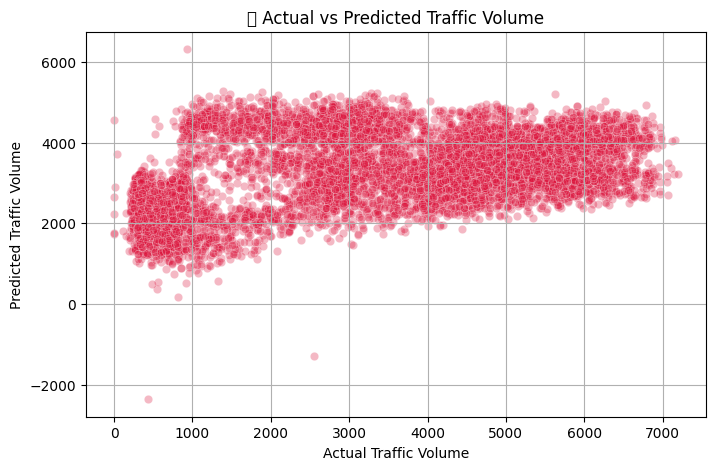

In [20]:
# 📉 Step 9: Actual vs Predicted Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='crimson')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("📊 Actual vs Predicted Traffic Volume")
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


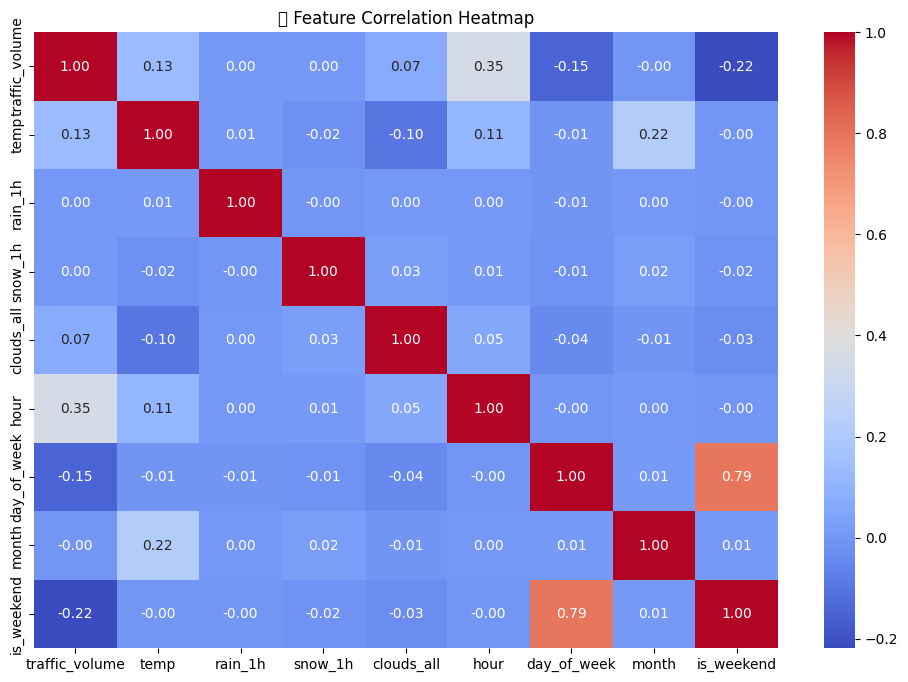

In [21]:
# 🔥 Step 10: Correlation Heatmap
plt.figure(figsize=(12,8))
corr_matrix = df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week', 'month', 'is_weekend']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📌 Feature Correlation Heatmap")
plt.show()